In [1]:
import os, json, random
from pathlib import Path
from label_studio_sdk import Client, Project

while ".git" not in os.listdir(os.getcwd()): prj_dir = os.chdir(Path(os.getcwd())/"..")

from utils.boxes import xywh2xy_xy

In [2]:
source_name = 'self'
data_folder = Path(f'data/sources/{source_name}')

API_KEY = "d712ce38ee93be108a58121c0d1b0577663dce72"
LABEL_STUDIO_URL = 'http://localhost:8887'

ls = Client(url=LABEL_STUDIO_URL, api_key=API_KEY)
ls.check_connection()

{'status': 'UP'}

In [39]:
p = Project.get_from_id(ls, 1)
ts = p.get_labeled_tasks()
# print(ts[0])
#print(json.dumps(ts[0]['annotations'], indent=1))
ts[0]['annotations'][0]['result'][0]

{'original_width': 1360,
 'original_height': 800,
 'image_rotation': 0,
 'value': {'points': [[52.28758169934641, 14.285714285714285],
   [54.07011289364231, 17.74891774891775],
   [54.918937271878455, 16.594516594516595],
   [53.05152363975893, 13.275613275613276]],
  'closed': True,
  'polygonlabels': ['Car']},
 'id': 'GvmNA2Ln4W',
 'from_name': 'label',
 'to_name': 'image',
 'type': 'polygonlabels',
 'origin': 'manual'}

In [47]:
img_infos = []
for t in ts:
    img = {
        'file_name': p.get_files_from_tasks([t])[0],
        'annotations': []
    }
    # print(json.dumps(t['annotations'], indent=1))
    # for a in t['annotations']:
    for r in t['annotations'][0]['result']:
        # print(len(a['result']))
        # pass
        # if 'value' in a:
        # print(json.dumps(r, indent=1))
        values = r['value']['points']
        # print(values)
        x = [v[0] for v in values] 
        y = [v[1] for v in values]
        x_min = min(x)
        y_min = min(y)
        x_size, y_size = r['original_width'], r['original_height']
        img['annotations'].append({
            'bbox': [x_min/100*x_size, y_min/100*y_size, (max(x) - x_min)/100*x_size, (max(y) - y_min)/100*y_size]
        })
    img_infos.append(img)

print(json.dumps(img_infos, indent=1))

[
 {
  "file_name": "/home/preschen/.local/share/label-studio/media/upload/1/1f6d3e9b-op-20-hahn.jpg",
  "annotations": [
   {
    "bbox": [
     711.1111111111112,
     106.20490620490621,
     35.7864357864358,
     35.7864357864358
    ]
   },
   {
    "bbox": [
     997.4025974025974,
     167.3881673881674,
     45.02164502164502,
     26.551226551226538
    ]
   },
   {
    "bbox": [
     958.1529581529583,
     110.82251082251082,
     42.712842712842665,
     43.86724386724387
    ]
   },
   {
    "bbox": [
     930.4473304473306,
     114.28571428571428,
     36.94083694083688,
     36.94083694083693
    ]
   },
   {
    "bbox": [
     163.92496392496395,
     84.27128427128427,
     56.565656565656546,
     26.55122655122655
    ]
   },
   {
    "bbox": [
     49.63924963924964,
     80.8080808080808,
     53.1024531024531,
     25.396825396825406
    ]
   },
   {
    "bbox": [
     71.57287157287159,
     144.3001443001443,
     36.94083694083693,
     45.021645021645014
   

In [48]:
with open(f'data/unified/sources/{source_name}.json', 'w') as f:
    json.dump(list(img_infos), f, indent = 4)

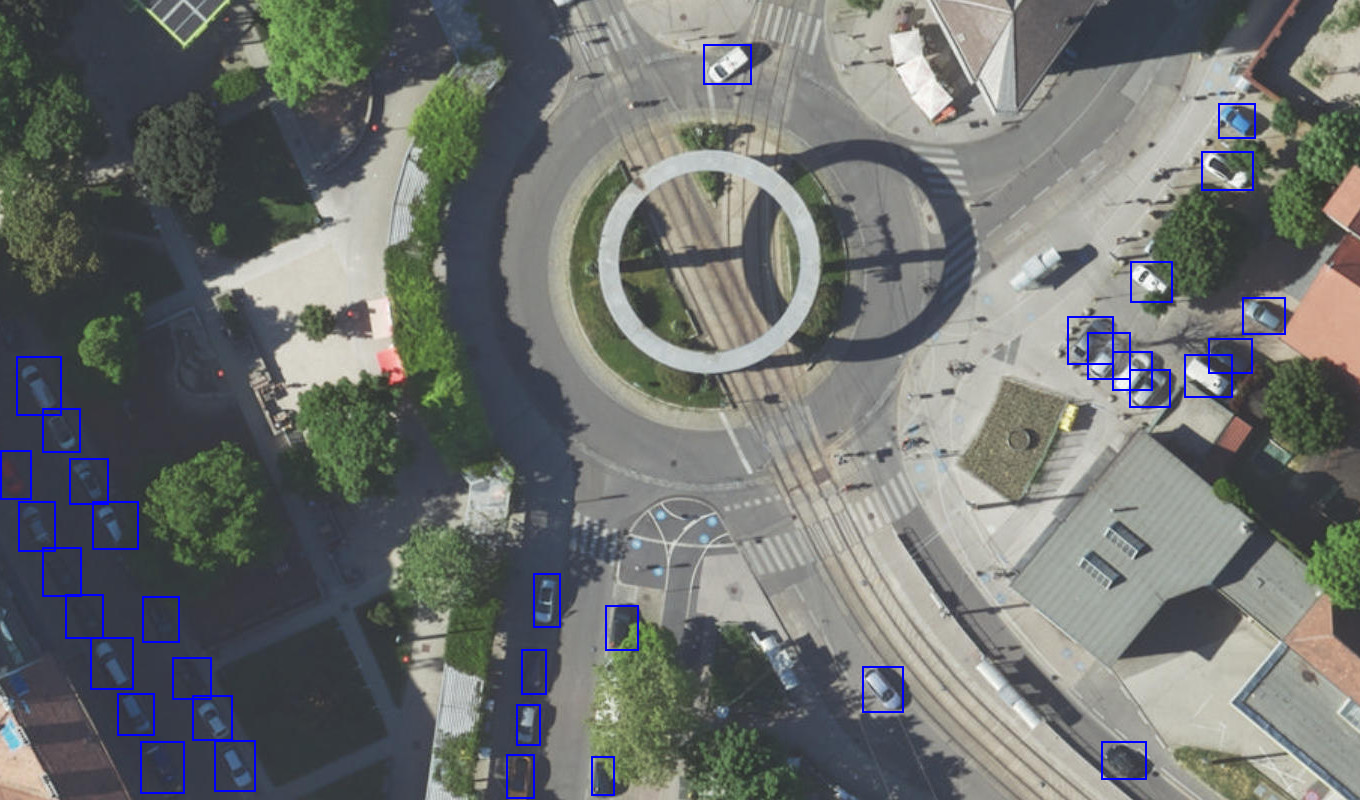

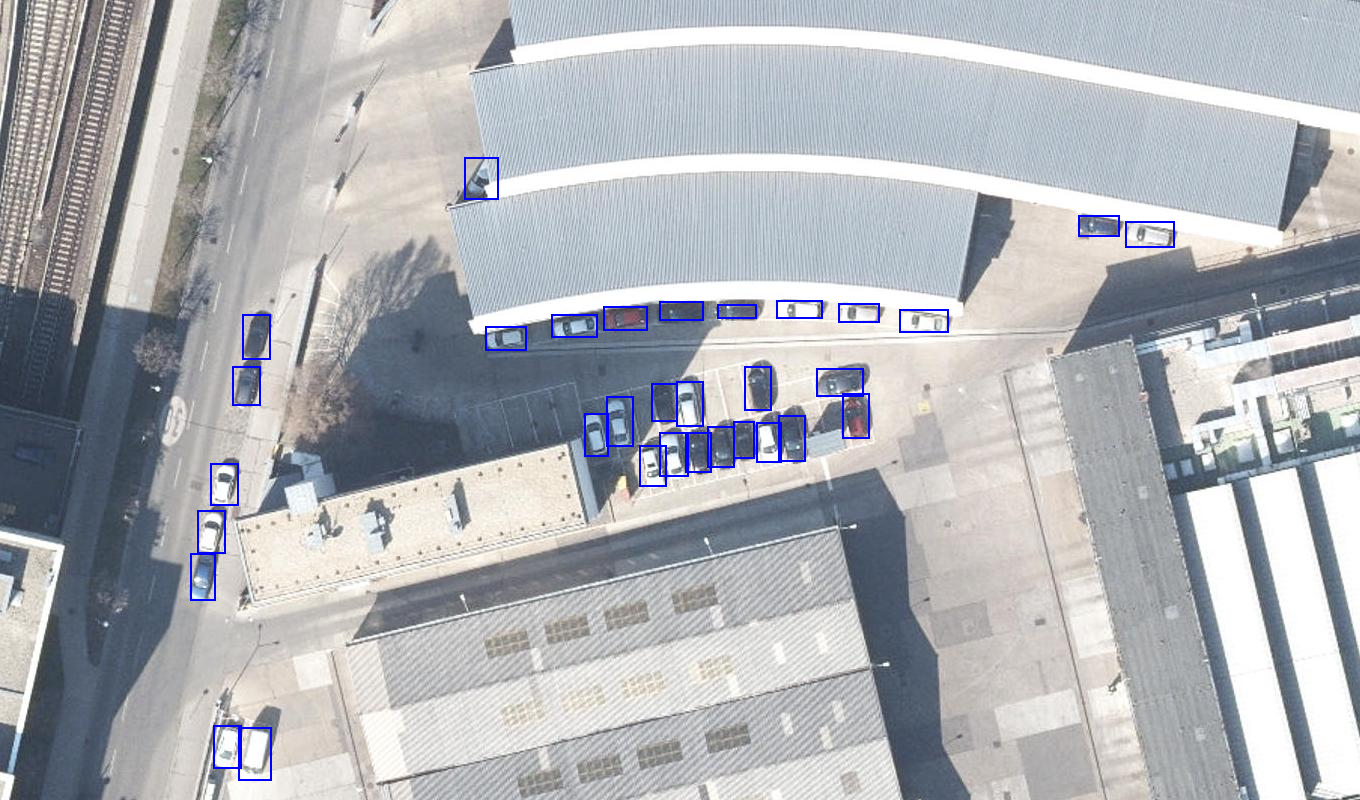

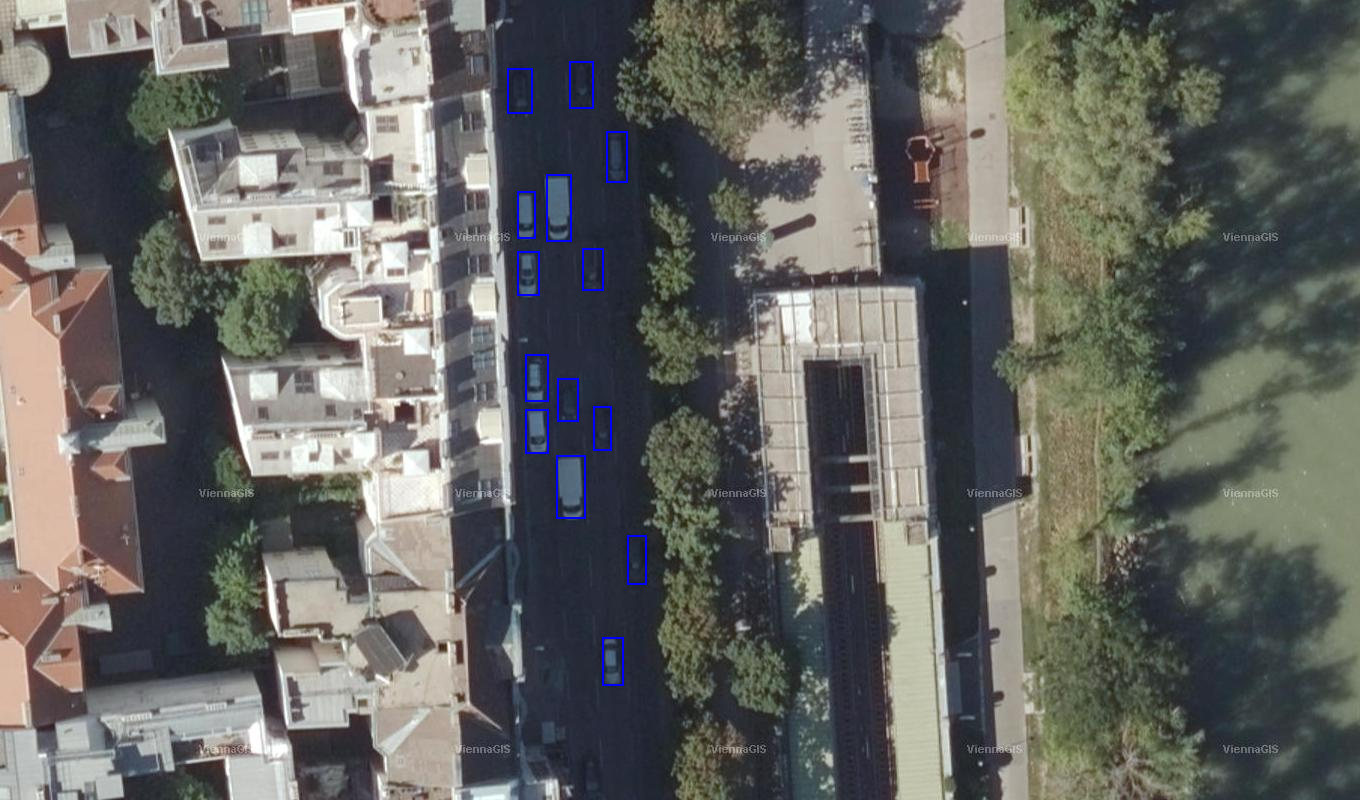

In [49]:
from PIL import Image, ImageDraw

    
def drawTest(img_info):
    img = Image.open(img_info['file_name'])
    draw = ImageDraw.Draw(img)

    for a in img_info['annotations']:
        draw.rectangle(xywh2xy_xy(a['bbox']), outline="blue",  width=2)

    display(img)    


idx = list(range(len(img_infos)))
random.shuffle(idx)

for i in range(3):
    img_info = img_infos[idx[i]]
    drawTest(img_info)